In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset=load_breast_cancer()
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['target']=dataset['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
from sklearn.model_selection import train_test_split
data=df.loc[:, df.columns != 'target']
target=df['target']
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.20,random_state=1)

In [4]:
print('train data of x_train is: ',x_train.shape)
print('train data of x_test is: ',x_test.shape)
print('train data of y_train is: ',y_train.shape)
print('train data of y_train is: ',y_test.shape)

train data of x_train is:  (455, 30)
train data of x_test is:  (114, 30)
train data of y_train is:  (455,)
train data of y_train is:  (114,)


In [5]:
print(y_train.value_counts())
print(y_test.value_counts())

1    285
0    170
Name: target, dtype: int64
1    72
0    42
Name: target, dtype: int64


In [6]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)
#
y_pred=logreg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  4],
       [ 2, 70]], dtype=int64)

In [8]:
print(metrics.classification_report(y_test,y_pred,digits=3))


              precision    recall  f1-score   support

           0      0.950     0.905     0.927        42
           1      0.946     0.972     0.959        72

    accuracy                          0.947       114
   macro avg      0.948     0.938     0.943       114
weighted avg      0.947     0.947     0.947       114



In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = GaussianNB()
clf7 = GradientBoostingClassifier(random_state=42)


In [12]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]
param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]
param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]
param6 = {}
# param6['var_smoothing'] = np.logspace(0,-9, num=100)
param6['classifier'] = [clf6]
param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

RandomForestClassifier(max_depth=10, random_state=42)
Test ROC AUC Score: 0.9675324675324675
SVC(C=100, probability=True, random_state=42)
Test ROC AUC Score: 0.9342105263157896
LogisticRegression(C=0.1, random_state=42)
Test ROC AUC Score: 0.9605128205128205
DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=5,
                       min_samples_split=10, random_state=42)
Test ROC AUC Score: 0.941025641025641
KNeighborsClassifier(n_neighbors=25)
Test ROC AUC Score: 0.9231200897867564
GaussianNB()
Test ROC AUC Score: 0.947972972972973
GradientBoostingClassifier(max_depth=5, n_estimators=250, random_state=42)
Test ROC AUC Score: 0.947972972972973




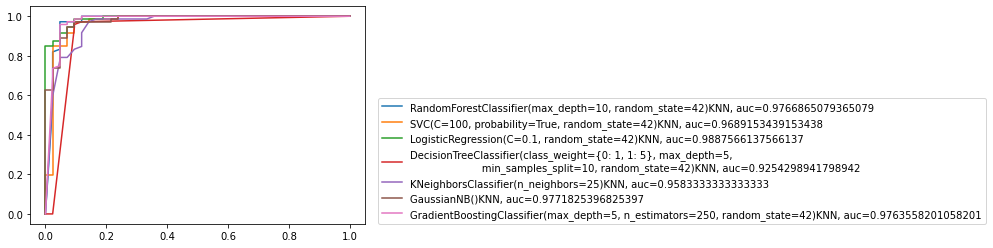

In [35]:
import matplotlib.pyplot as plt

c=0
for i in(clf1,clf2,clf3,clf4,clf5,clf6,clf7):
 
    pipeline = Pipeline([('classifier', i)])
    params = [param1, param2, param3, param4, param5, param6, param7]
    gs = GridSearchCV(pipeline, params[c], cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)
    # print(gs.best_params_)
    print(i)
    # print(pipeline, params[c])
    c=c+1
    if(i==i):
        y_pred_proba = gs.predict_proba(x_test)[::,1]
        fpr_k, tpr_k, _k = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr_k,tpr_k,label=str(i).partition("!")[0]+"KNN, auc="+str(auc))
        plt.legend()
        plt.legend(loc=(1.04,0))

    print("Test ROC AUC Score:",roc_auc_score(gs.predict(x_test), y_test))
  

    
print("\n")

In [ ]:
print("Best AUC: Logistic Regression 0.98")